# Nearest Neighbors Classification: Selection of hyperparameters


Adapted by <alberto.suarez@uam.es>

from
Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import time

Minimun training error:	 6.00 % 	 k = 1 
Minimun test error:	18.00 %  	 k = 13 


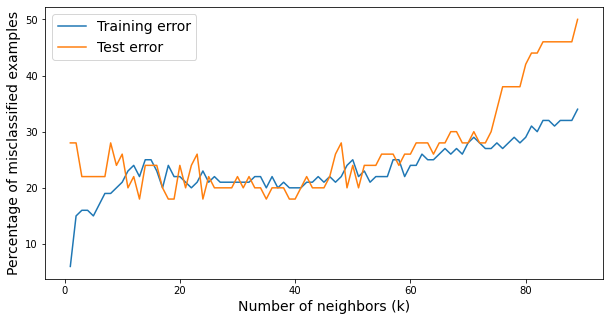

In [2]:
# Import a dataset.
dataset = datasets.load_iris()

indices_features = [0, 1]

X = dataset.data[:, indices_features]
y = dataset.target

random_state = 17 # For reproducibility 
# Partition the data into training and test sets
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                     train_size= 2.0/3.0, 
                                                     random_state=random_state, 
                                                     shuffle=True) 

# Center and scale data based on the training set 

scaler_train = preprocessing.StandardScaler()
scaler_train.fit(X_train)

X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_train.transform(X_test)

k_min, k_max = 1, 90
n_neighbors = range(k_min, k_max)

err_train = np.zeros(len(n_neighbors))
err_test = np.zeros(len(n_neighbors))

for n, k in enumerate(n_neighbors):
    # Create an instance of a Neighbours Classifier.
    classifier = neighbors.KNeighborsClassifier(k, 
                                                weights='uniform')
    # Train the classifier using the data
    classifier.fit(X_train_scaled, y_train)
    
    # Compute predictions and error on the test set.

    y_test_pred = classifier.predict(X_test)

    err_train[n] = 1.0 - accuracy_score(y_train, 
                                       classifier.predict(X_train_scaled))
    err_test[n] = 1.0 - accuracy_score(y_test, 
                                       classifier.predict(X_test_scaled))

# Plot the error curves: Error as a function of k (# of neighbors)
    
fig, ax = plt.subplots(1,1, figsize=(10, 5))  
ax.plot(n_neighbors, 100.0*err_train, label='Training error')
ax.plot(n_neighbors, 100.0*err_test, label='Test error')

fontsize = 14

ax.set_xlabel('Number of neighbors (k)', fontsize=fontsize)
ax.set_ylabel('Percentage of misclassified examples', fontsize=fontsize)
ax.legend(fontsize=fontsize)

# Compute minimum error and optimal number of neighbors

index_min = np.argmin(err_train)
err_train_min = err_train[index_min]
k_train_min = index_min + k_min 

index_min = np.argmin(err_test)
err_test_min = err_test[index_min]
k_test_min = index_min  + k_min 

print('Minimun training error:\t{:5.2f} % \t k = {} '.format(100.0*err_train_min, k_train_min))
print('Minimun test error:\t{:5.2f} %  \t k = {} '.format(100.0*err_test_min, k_test_min))

## Evaluation of classifiers: Leave-one-out cross-validation

More material to be found in:
https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators

Minimun training error:	 6.00 % 	 k = 1 
Minimun loo error:	20.00 %   	 k = 39 [11.03 seconds]
Minimun test error:	18.00 %  	 k = 13 


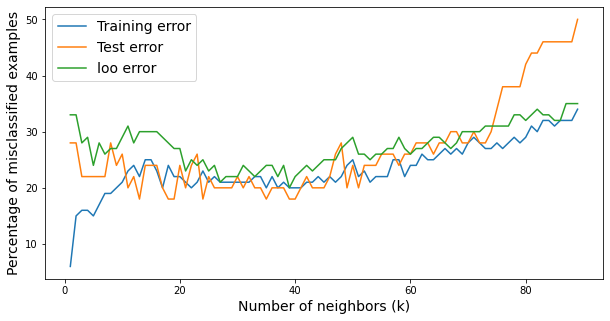

In [3]:
# leave-one-out (loo) cross validation

def compute_loo_error(X, y, classifier):
    """ Computes the leave one out error of a classifier on a """
    n_train = np.shape(X_train)[0]
    
    loo_err = 0

    for i in range(n_train):
    
 
        # The ith sample for testing
        X_test_i = X[i, :]
        X_test_i = X_test_i[np.newaxis,:]
        y_test_i = y[i]
        y_test_i = y_test_i[np.newaxis]

        # Exclude the ith sample from the training set
        X_train_i = np.delete(X, (i), axis=0)
        y_train_i = np.delete(y, (i))
 
        # NOTE: We could have used the LeaveOneOut iterator from sklearn
        # >>> from sklearn.model_selection import LeaveOneOut

        # Train the classifier on this sample
        classifier.fit(X_train_i, y_train_i)
        
        # Caluculate the error on the ith sample
        err_test_i = 1.0 - accuracy_score(y_test_i, 
                                          classifier.predict(X_test_i))
        # Accumulate the error
        loo_err = loo_err + err_test_i

    # Normalize error        
    loo_err = loo_err / n_train    
    return loo_err

# Compute the training, testing & loo error for our dataset

start_time = time.time()         # START: measure time

err_loo = np.zeros(len(n_neighbors)) 

for n, k in enumerate(n_neighbors):
    # Create an instance of a Neighbours Classifier.
    classifier = neighbors.KNeighborsClassifier(k, 
                                                weights='uniform')
    err_loo[n] = compute_loo_error(X_train_scaled, y_train, classifier)
    
    
end_time = time.time()
loo_time = end_time - start_time # END: measure time

fig, ax = plt.subplots(1,1, figsize=(10, 5))  
ax.plot(n_neighbors, 100.0*err_train, label='Training error')
ax.plot(n_neighbors, 100.0*err_test, label='Test error')
ax.plot(n_neighbors, 100.0*err_loo, label='loo error')

fontsize = 14

ax.set_xlabel('Number of neighbors (k)', fontsize=fontsize)
ax.set_ylabel('Percentage of misclassified examples', fontsize=fontsize)
ax.legend(fontsize=fontsize)

index_min = np.argmin(err_loo) 
err_loo_min = err_loo[index_min]
k_loo_min = index_min + k_min 

print('Minimun training error:\t{:5.2f} % \t k = {} '.format(100.0*err_train_min, k_train_min))
print('Minimun loo error:\t{:5.2f} %   \t k = {} [{:.2f} seconds]'.format(100.0*err_loo_min, 
                                                                          k_loo_min,
                                                                          loo_time))
print('Minimun test error:\t{:5.2f} %  \t k = {} '.format(100.0*err_test_min, k_test_min))

 # k-fold cross-validation

### An illustration of how k-fold cross-validation works

In [4]:
# Make the necessary imports

from sklearn.model_selection import KFold, StratifiedKFold

n_splits = 5 # Number of folds

# Initialize an instance of a KFold object without shuffling

kf = KFold(n_splits=n_splits, shuffle=False)

# Partition the set of training data into k disjoint subselts

kf.get_n_splits(X_train)

print(kf)

for i, (cv_train_indices, cv_test_indices) in enumerate(kf.split(X_train)):
    print('\nFOLD: {}'.format(i))
    print("Cross-validation test samples:", cv_test_indices)
    print("Cross-validation training samples:", cv_train_indices)   

KFold(n_splits=5, random_state=None, shuffle=False)

FOLD: 0
Cross-validation test samples: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Cross-validation training samples: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]

FOLD: 1
Cross-validation test samples: [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Cross-validation training samples: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 40 41 42 43
 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94 95 96 97 98 99]

FOLD: 2
Cross-validation test samples: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
Cross-validation training samples: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 1

In [5]:
# Make the necessary imports

from sklearn.model_selection import KFold, StratifiedKFold

n_splits = 5 # Number of folds

# Initialize an instance of a KFold object without shuffling

random_state = 10 # For reproducible results
kf = KFold(n_splits=n_splits, random_state=random_state, shuffle=True)

# Partition the set of training data into k disjoint subselts

kf.get_n_splits(X_train)

print(kf)

for i, (cv_train_indices, cv_test_indices) in enumerate(kf.split(X_train)):
    print('\nFOLD: {}'.format(i))
    print("Cross-validation test samples:", cv_test_indices)
    print("Cross-validation training samples:", cv_train_indices)   

KFold(n_splits=5, random_state=10, shuffle=True)

FOLD: 0
Cross-validation test samples: [ 1  2  3 14 19 26 37 38 41 43 46 53 59 60 66 68 74 79 92 95]
Cross-validation training samples: [ 0  4  5  6  7  8  9 10 11 12 13 15 16 17 18 20 21 22 23 24 25 27 28 29
 30 31 32 33 34 35 36 39 40 42 44 45 47 48 49 50 51 52 54 55 56 57 58 61
 62 63 64 65 67 69 70 71 72 73 75 76 77 78 80 81 82 83 84 85 86 87 88 89
 90 91 93 94 96 97 98 99]

FOLD: 1
Cross-validation test samples: [ 4  5  6 21 34 35 39 42 44 45 48 50 52 55 61 63 70 76 84 90]
Cross-validation training samples: [ 0  1  2  3  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26 27
 28 29 30 31 32 33 36 37 38 40 41 43 46 47 49 51 53 54 56 57 58 59 60 62
 64 65 66 67 68 69 71 72 73 74 75 77 78 79 80 81 82 83 85 86 87 88 89 91
 92 93 94 95 96 97 98 99]

FOLD: 2
Cross-validation test samples: [ 7 10 17 20 24 32 47 56 58 67 71 80 81 83 86 87 96 97 98 99]
Cross-validation training samples: [ 0  1  2  3  4  5  6  8  9 11 12 13 14 15 16 18 1

## Cross-validation example


In [6]:
def compute_cv_error(X, y, 
                     n_splits, 
                     classifier, 
                     scaler_cv=None, 
                     shuffle=True, stratified=True):
    """ Computes the k-fold cross-validation error of a classifier"""

    # Partition the set of training data into k disjoint subselts

    if stratified:
        kf = StratifiedKFold(n_splits=n_splits, shuffle=shuffle)
    else:
        kf = KFold(n_splits=n_splits, shuffle=shuffle)        
        
    kf.get_n_splits(X)

    # Train a classifier and compute the error for each of the folds
   
    err_cv_folds = np.zeros(n_splits)
    
    for n, (cv_train_indices, cv_test_indices) in enumerate(kf.split(X, y)):
    
        X_cv_train = X[cv_train_indices, :]
        y_cv_train = y[cv_train_indices]
        
        X_cv_test = X[cv_test_indices, :]
        y_cv_test = y[cv_test_indices]
        
        if np.ndim(X_cv_test) == 1:
            X_cv_test = X_cv_test[np.newaxis,:]
            y_cv_test = y_cv_test[np.newaxis]
    
        """"
        Scaling within each fold is a more consistent statistical
        procedure.
        However, if scaling is thought of as preprocessing, one 
        would use the scaling for the whole data. 
        In practice, it does not matter much whether scaling is
        carried out for the whole set or for each fold.
        """    
        if scaler_cv is not None:
            scaler_cv.fit(X_cv_train)
            X_cv_train = scaler_cv.transform(X_cv_train)
            X_cv_test = scaler_cv.transform(X_cv_test)

        # Train the classifier using the training set
        classifier.fit(X_cv_train, y_cv_train)
    
        # Compute predictions and error on the training and test sets.

        y_cv_test_pred = classifier.predict(X_cv_test)

        err_cv_folds[n] = 1.0 - accuracy_score(y_cv_test, 
                                               y_cv_test_pred)

    return err_cv_folds
    
# Stratified k-fold cross validation
# Keep the same proportion of classes in folds as in the original data
k = 4   
n_splits = 10 # Number of folds

# Create an instance of a Neighbours Classifier
classifier = neighbors.KNeighborsClassifier(k, 
                                            weights='uniform')

err_cv_folds = compute_cv_error(X_train, y_train, n_splits=n_splits, 
                                classifier=classifier, 
                                scaler_cv=scaler_train, 
                                shuffle=True, stratified=True)

err_cv = 100.0*np.mean(err_cv_folds)
stdev_err_cv = 100.0*np.std(err_cv_folds)

print('Cross-validation error = {:6.2f} ({:.2f})'.format(err_cv, stdev_err_cv))

for i in range(n_splits):
    print('Error in fold {}: {:5.2f} '.format(i, 100.0*err_cv_folds[i]))

Cross-validation error =  24.00 (13.56)
Error in fold 0: 30.00 
Error in fold 1: 40.00 
Error in fold 2: 50.00 
Error in fold 3: 10.00 
Error in fold 4: 30.00 
Error in fold 5: 10.00 
Error in fold 6: 30.00 
Error in fold 7: 10.00 
Error in fold 8: 10.00 
Error in fold 9: 20.00 


Minimun training error:	 6.00 % 	 k = 1 
Minimun loo error:	20.00 %   	 k = 39 [11.03 seconds]
Minimun CV error:	20.00 %   	 k = 33  [2.03 seconds]
Minimun test error:	18.00 %  	 k = 13 


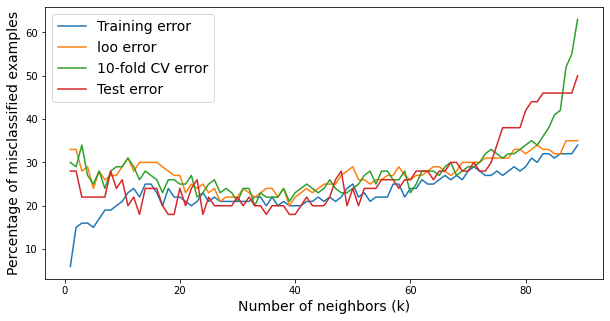

In [7]:
# Compute the training, testing & loo error for our dataset

n_splits = 10 # Number of folds

start_time = time.time()        # BEGIN: measure time

err_cv = np.zeros(len(n_neighbors))

for n, k in enumerate(n_neighbors):
    # Create an instance of a Neighbours Classifier.
    classifier = neighbors.KNeighborsClassifier(k, 
                                                weights='uniform')

    err_cv_folds = compute_cv_error(X_train, y_train, n_splits=n_splits, 
                                classifier=classifier, 
                                scaler_cv=scaler_train, 
                                shuffle=True, stratified=True)

    err_cv[n] = np.mean(err_cv_folds)


end_time = time.time()
cv_time = end_time - start_time # END: measure time

fig, ax = plt.subplots(1,1, figsize=(10, 5))  
ax.plot(n_neighbors, 100.0*err_train, label='Training error')
ax.plot(n_neighbors, 100.0*err_loo, label='loo error')
ax.plot(n_neighbors, 100.0*err_cv, label='{}-fold CV error'.format(n_splits))
ax.plot(n_neighbors, 100.0*err_test, label='Test error')

fontsize = 14

ax.set_xlabel('Number of neighbors (k)', fontsize=fontsize)
ax.set_ylabel('Percentage of misclassified examples', fontsize=fontsize)
ax.legend(fontsize=fontsize)

index_min = np.argmin(err_cv) 
err_cv_min = err_cv[index_min]
k_cv_min = index_min + k_min 

print('Minimun training error:\t{:5.2f} % \t k = {} '.format(100.0*err_train_min, k_train_min))
print('Minimun loo error:\t{:5.2f} %   \t k = {} [{:.2f} seconds]'.format(100.0*err_loo_min, 
                                                                          k_loo_min,
                                                                          loo_time))
print('Minimun CV error:\t{:5.2f} %   \t k = {}  [{:.2f} seconds]'.format(100.0*err_cv_min, 
                                                                     k_cv_min, 
                                                                     cv_time))
print('Minimun test error:\t{:5.2f} %  \t k = {} '.format(100.0*err_test_min, k_test_min))

In [8]:
# Train the final classifier on the whole training set
# using the optimal model & hyperparameters


# Optimal number of neighbors determined by some form cross-validation

k_final = k_cv_min

classifier_final = neighbors.KNeighborsClassifier(k_final, 
                                                  weights='uniform')

classifier_final.fit(X_train_scaled, y_train)

y_test_pred = classifier_final.predict(X_test_scaled)
err_test = 1.0 - accuracy_score(y_test, y_test_pred)


print('Validation error: {:5.2f} %   \t k = {}'.format(100.0*err_cv_min, 
                                                      k_final))
print('Test error:       {:5.2f} %'.format(100.0*err_test))


Validation error: 20.00 %   	 k = 33
Test error:       20.00 %


## What have we learned?

1. Only the training data set should be used for selection of the classifier and its hyperparameters (for instance, the optimal number of neighbors in k-NN).

2. Using the test data in the training phase will give us biased estimates of the generalization error. This problem is often referred to as 'data leakage'. Unfortunately, it is fairly easy to inadvertently peek into the test data in difficult to identify ways (using the whole dataset - train and test sets - for centering and scaling, estimating hyperparameters based on the test set errors. 

3. Once the best hyperparameters have been determined using some sort of validation, one should retrain the classifier using the whole data set.

## For further exploration:

1. The cross-validation scoring method is implemented in sklearn. For futher reference 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


## Exercises
1. Use the function *compute_cv_error* to mimic the operation of *compute_loo_error*:
2. Use the sklearn iterator LeaveOneOut to implement the  *compute_loo_error*:
3. In k_fold cross-validation, compare the results of using the scaler for the whole training data or scaling within each of the folds.
4. Which validation method (loo or k-fold CV) has more bias?
5. Which validation method (loo or k-fold CV) has more variance?
6. Search for information in the documentation of sklearn which of the following cross-validation methods is, as a general rule preferred.: simple validation, 2-fold CV, 3-fold, 5-fold, 10-fold, 10-fold CV, 50-fold CV, leave-one-out.
7. Use the sklearn cross-validation funtion in a pipeline together with StandardScaler to generate the last plot.